<a href="https://colab.research.google.com/github/WilmarAriza/WilmarAriza/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

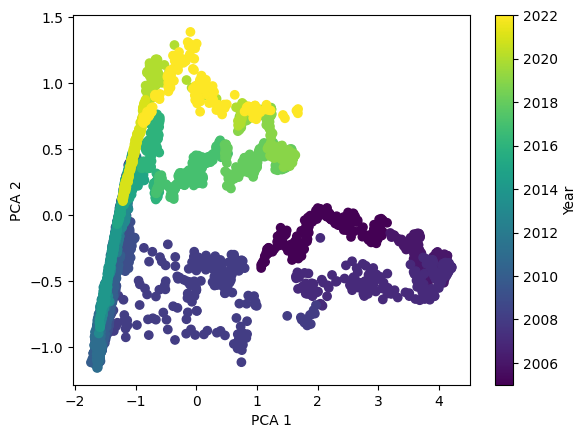

In [3]:
!pip install quandl -q

import quandl
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Download yield curve data from FRED
quandl.ApiConfig.api_key = '3EJLHe95YFKGAxUmUtz4'
df = quandl.get('FRED/DGS10', trim_start='2005-01-01', trim_end='2024-05-31')
df = df.rename(columns={'Value': 'DGS10'})
df['DGS3MO'] = quandl.get('FRED/DGS3MO', trim_start=df.index[0], trim_end=df.index[-1])['Value']
df['DGS2'] = quandl.get('FRED/DGS2', trim_start=df.index[0], trim_end=df.index[-1])['Value']
df['DGS3'] = quandl.get('FRED/DGS3', trim_start=df.index[0], trim_end=df.index[-1])['Value']
df['DGS5'] = quandl.get('FRED/DGS5', trim_start=df.index[0], trim_end=df.index[-1])['Value']
df['DGS7'] = quandl.get('FRED/DGS7', trim_start=df.index[0], trim_end=df.index[-1])['Value']
df['DGS20'] = quandl.get('FRED/DGS20', trim_start=df.index[0], trim_end=df.index[-1])['Value']

# Calculate yield curve factors
df['Slope'] = df['DGS2'] - df['DGS10']
df['Curvature'] = df['DGS2'] + df['DGS10'] - 2*df['DGS5']
df['Level'] = df['DGS3MO']

# Perform PCA
X = df[['Level', 'Slope', 'Curvature']].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df.index.year, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Year')
plt.show()
